#1. Loading and Understanding the data

In [41]:
# Import required libraries

# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow
tensorflow.__version__

'2.9.2'

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import os
os.chdir('/content/drive/MyDrive/flowers')

In [44]:
 #Extracting the images and storing it in a dataframe
import cv2

file_path = '/content/drive/MyDrive/flowers/train' 
df = pd.DataFrame(columns=['file_name','class','image'])

In [45]:
#Creating columns for images,file path and their corresponding classes
for i in os.listdir(file_path):
    if i != '.DS_Store': #This if condition is machine specific - can be ignored 
        print(i)
        for j in os.listdir(os.path.join(file_path,i)):
            img = cv2.imread(os.path.join(file_path,i,j))
            df = df.append({'file_name':j,'class':i,'image':img},ignore_index=True)

daisy
rose
dandelion
sunflower
tulip


In [46]:
#Checking if the data is loaded into the dataframe with the right columns
df


,file_name,class,image
0,10140303196_b88d3d6cec.jpg,daisy,"[[[228, 220, 213], [220, 212, 212], [215, 207,..."
1,10172379554_b296050f82_n.jpg,daisy,"[[[120, 132, 138], [115, 127, 131], [117, 130,..."
2,10172636503_21bededa75_n.jpg,daisy,"[[[32, 51, 32], [30, 46, 29], [33, 43, 30], [2..."
3,10172567486_2748826a8b.jpg,daisy,"[[[82, 16, 27], [81, 15, 26], [81, 15, 26], [7..."
4,10300722094_28fa978807_n.jpg,daisy,"[[[47, 0, 23], [49, 2, 28], [49, 4, 31], [43, ..."
...,...,...,...
3417,8712230357_1298b8513b.jpg,tulip,"[[[180, 146, 163], [179, 143, 167], [180, 139,..."
3418,8708209606_d3aede4801.jpg,tulip,"[[[240, 193, 141], [251, 201, 159], [255, 226,..."
3419,8702982836_75222725d7.jpg,tulip,"[[[255, 253, 252], [255, 253, 254], [246, 254,..."
3420,8706523526_a0f161b72b.jpg,tulip,"[[[9, 12, 16], [1, 5, 6], [8, 12, 13], [12, 14..."


In [47]:
# Checking the total number of images extracted
df.info()

#There are 3422 images in total which are of object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3422 entries, 0 to 3421
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  3422 non-null   object
 1   class      3422 non-null   object
 2   image      3422 non-null   object
dtypes: object(3)
memory usage: 80.3+ KB


In [48]:
# Checking if there are any empty images read
df.isnull().sum()
#There are no null values on the dataset

file_name    0
class        0
image        0
dtype: int64

In [49]:
# Creating X_train and y_train from the train data

X_tr = df['image']
y_train = df['class']

In [50]:
# Reshaping X_train suitable for the model

import cv2
X_train = []

for i, j in enumerate(X_tr):
    img = cv2.resize(j, (128, 128))
    X_train.append(img)
X_train = np.array(X_train)    

In [51]:
#Analyze the dimensions of the data.
X_train.shape

#All the images are of the same dimension 

(3422, 128, 128, 3)

In [52]:
# Vizualizing the images

def sample_img(df,n):
    df = df.sample(n)
    plt.figure(figsize=(20,20))
    for i,j in enumerate(df.iterrows()):
        plt.subplot(1,n,i+1)
        plt.imshow(j[1]['image'])
        plt.title("{}".format(j[1]['class'])) 

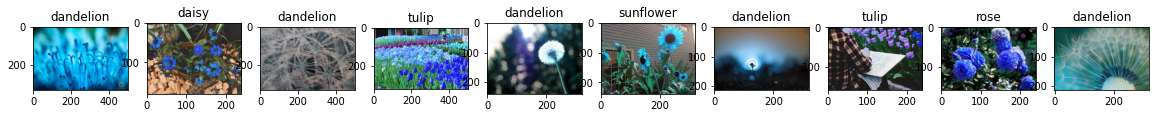

In [53]:
sample_img(df, 10)

#2. Data Preparation


In [54]:
#Split the dataset into train and validation

from sklearn.model_selection import train_test_split

X_trn, X_val, y_trn, y_val = train_test_split(X_train,y_train,test_size=0.2, random_state=0)

In [55]:
#One hot encode the target variable.

y_trn_onehot = pd.get_dummies(y_trn)
y_val_onehot = pd.get_dummies(y_val)

In [56]:
print("Shape of y_trn:", y_trn_onehot.shape)
print("One value of y_val:", y_val_onehot.shape)

Shape of y_trn: (2737, 5)
One value of y_val: (685, 5)


In [57]:
#Normalize the data.

X_trn = (X_trn/255).astype('float32')
X_val = (X_val/255).astype('float32')

# 3. Train, tune, test, and Compare Deep Learning image classifier model 

In [58]:
#Use CNN for Training.

# Initializing basic CNN model

from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.models import Sequential


model = Sequential()
model.add(Conv2D(filters=128, kernel_size=3, activation="relu", input_shape=(128, 128, 3)))
model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(5, activation="softmax"))


# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 128)     3584      
                                                                 
 conv2d_4 (Conv2D)           (None, 124, 124, 64)      73792     
                                                                 
 conv2d_5 (Conv2D)           (None, 122, 122, 32)      18464     
                                                                 
 flatten_1 (Flatten)         (None, 476288)            0         
                                                                 
 dense_13 (Dense)            (None, 64)                30482496  
                                                                 
 dense_14 (Dense)            (None, 128)               8320      
                                                                 
 dense_15 (Dense)            (None, 5)                

In [59]:
#fit the model
basic_cnn_history = model.fit(x=X_trn, y=y_trn_onehot, 
                             batch_size=32, 
                             epochs=20, 
                             validation_data=(X_val, y_val_onehot))

Epoch 1/20
86/86 [==============================] - 10s 107ms/step - loss: 1.5233 - accuracy: 0.3803 - val_loss: 1.3600 - val_accuracy: 0.4628
Epoch 2/20
86/86 [==============================] - 8s 98ms/step - loss: 1.3038 - accuracy: 0.4954 - val_loss: 1.2540 - val_accuracy: 0.4526
Epoch 3/20
86/86 [==============================] - 8s 98ms/step - loss: 1.1373 - accuracy: 0.5455 - val_loss: 1.1887 - val_accuracy: 0.5328
Epoch 4/20
86/86 [==============================] - 8s 98ms/step - loss: 0.8473 - accuracy: 0.6960 - val_loss: 1.2143 - val_accuracy: 0.5153
Epoch 5/20
86/86 [==============================] - 8s 98ms/step - loss: 0.5368 - accuracy: 0.8202 - val_loss: 1.7264 - val_accuracy: 0.5255
Epoch 6/20
86/86 [==============================] - 9s 99ms/step - loss: 0.2596 - accuracy: 0.9189 - val_loss: 2.3635 - val_accuracy: 0.5372
Epoch 7/20
86/86 [==============================] - 9s 100ms/step - loss: 0.1447 - accuracy: 0.9562 - val_loss: 3.1917 - val_accuracy: 0.5226
Epoch 8/20

In [60]:
#evaluate the model
model.evaluate(X_val, y_val_onehot)

#we can see that the accuracy is not good(0.40) and loss is very high(6.26),but this model has great performance with training data.Clearly the model is overfitting

22/22 [==============================] - 1s 33ms/step - loss: 3.9998 - accuracy: 0.5299


[3.9998323917388916, 0.5299270153045654]

In [61]:
#Use various CNN with transferred learning models for training
#VGG16

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = VGG16(input_shape=X_trn[0].shape,
                   weights='imagenet',
                   include_top=False) #imports the VGG16 model and discards the last 1000 neuron layer.

x = base_model.output
x = GlobalAveragePooling2D()(x) # Optional
x = Dense(1024, activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dense(512, activation='relu')(x) #dense layer 2
x = Dense(256, activation='relu')(x) #dense layer 3
preds = Dense(5, activation='softmax')(x) #final layer with softmax activation

model_vgg16 = Model(inputs=base_model.input,
                    outputs=preds)

# set the first 20 layers of the network to be non-trainable
for layer in model_vgg16.layers[:20]:
    layer.trainable=False
for layer in model_vgg16.layers[20:]:
    layer.trainable=True

# Compile the model
model_vgg16.compile(optimizer='Adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model_vgg16.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [62]:
tr_history = model_vgg16.fit(x=X_trn, 
                              y=y_trn_onehot, 
                              batch_size=64, 
                              epochs=20, 
                              validation_data=(X_val, y_val_onehot))

Epoch 1/20
43/43 [==============================] - 6s 134ms/step - loss: 1.0794 - accuracy: 0.5733 - val_loss: 0.7879 - val_accuracy: 0.7109
Epoch 2/20
43/43 [==============================] - 5s 127ms/step - loss: 0.6394 - accuracy: 0.7662 - val_loss: 0.6451 - val_accuracy: 0.7591
Epoch 3/20
43/43 [==============================] - 5s 128ms/step - loss: 0.5125 - accuracy: 0.7991 - val_loss: 0.5730 - val_accuracy: 0.7912
Epoch 4/20
43/43 [==============================] - 6s 129ms/step - loss: 0.4371 - accuracy: 0.8370 - val_loss: 0.6098 - val_accuracy: 0.7752
Epoch 5/20
43/43 [==============================] - 6s 129ms/step - loss: 0.3831 - accuracy: 0.8553 - val_loss: 0.5799 - val_accuracy: 0.7869
Epoch 6/20
43/43 [==============================] - 6s 130ms/step - loss: 0.3408 - accuracy: 0.8798 - val_loss: 0.5561 - val_accuracy: 0.7942
Epoch 7/20
43/43 [==============================] - 6s 131ms/step - loss: 0.3299 - accuracy: 0.8747 - val_loss: 0.5926 - val_accuracy: 0.7912
Epoch 

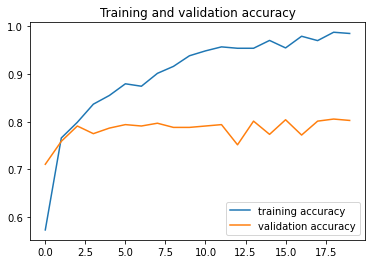

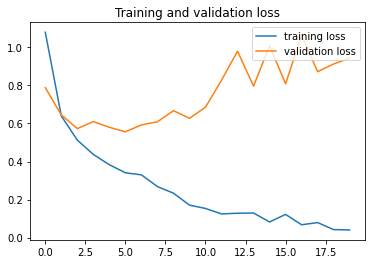

In [63]:
## Accuracy and Loss plots for VGG16

accuracy = tr_history.history['accuracy']
val_accuracy = tr_history.history['val_accuracy']
loss = tr_history.history['loss']
val_loss = tr_history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot(epochs, accuracy, label = 'training accuracy')
plt.plot(epochs, val_accuracy, label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot(epochs, loss, label = 'training loss')
plt.plot(epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation loss')
plt.show()

In [64]:
#Evaluate the model
model_vgg16.evaluate(X_val,y_val_onehot)
#We can see that the loss has been reduced(0.91) and there is an increase in the accuracy(0.78) when compared to the basic CNN model

22/22 [==============================] - 1s 54ms/step - loss: 0.9431 - accuracy: 0.8029


[0.9431044459342957, 0.8029196858406067]

In [65]:
#VGG19
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = VGG19(input_shape=X_trn[0].shape,
                   weights='imagenet',
                   include_top=False) #imports the VGG16 model and discards the last 1000 neuron layer.

x = base_model.output
x = GlobalAveragePooling2D()(x) # Optional
x = Dense(1024, activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dense(512, activation='relu')(x) #dense layer 2
x = Dense(256, activation='relu')(x) #dense layer 3
preds = Dense(5, activation='softmax')(x) #final layer with softmax activation

model_vgg19 = Model(inputs=base_model.input,
                    outputs=preds)

# set the first 20 layers of the network to be non-trainable
for layer in model_vgg19.layers[:20]:
    layer.trainable=False
for layer in model_vgg19.layers[20:]:
    layer.trainable=True

# Compile the model
model_vgg19.compile(optimizer='Adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model_vgg19.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [66]:
tr_history2 = model_vgg19.fit(x=X_trn, 
                              y=y_trn_onehot, 
                              batch_size=64, 
                              epochs=20, 
                              validation_data=(X_val, y_val_onehot))

Epoch 1/20
43/43 [==============================] - 8s 163ms/step - loss: 0.9547 - accuracy: 0.6292 - val_loss: 0.6087 - val_accuracy: 0.7620
Epoch 2/20
43/43 [==============================] - 7s 156ms/step - loss: 0.5001 - accuracy: 0.8184 - val_loss: 0.5158 - val_accuracy: 0.8234
Epoch 3/20
43/43 [==============================] - 7s 156ms/step - loss: 0.3696 - accuracy: 0.8718 - val_loss: 0.5619 - val_accuracy: 0.8073
Epoch 4/20
43/43 [==============================] - 7s 157ms/step - loss: 0.3097 - accuracy: 0.8838 - val_loss: 0.6412 - val_accuracy: 0.7781
Epoch 5/20
43/43 [==============================] - 7s 157ms/step - loss: 0.2281 - accuracy: 0.9160 - val_loss: 0.6348 - val_accuracy: 0.8117
Epoch 6/20
43/43 [==============================] - 7s 157ms/step - loss: 0.1554 - accuracy: 0.9503 - val_loss: 0.6929 - val_accuracy: 0.7869
Epoch 7/20
43/43 [==============================] - 7s 156ms/step - loss: 0.1315 - accuracy: 0.9573 - val_loss: 0.7155 - val_accuracy: 0.8073
Epoch 

Text(0.5, 1.0, 'Training and validation loss')

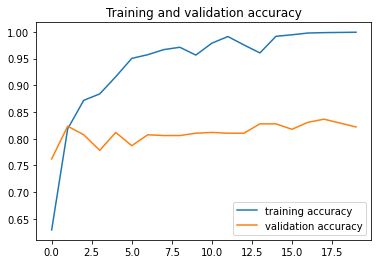

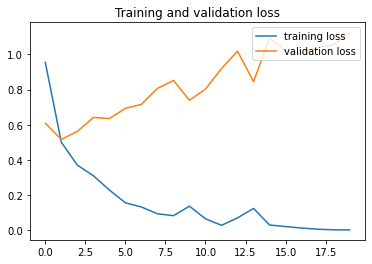

In [67]:
## Accuracy and Loss plots for VGG19

accuracy = tr_history2.history['accuracy']
val_accuracy = tr_history2.history['val_accuracy']
loss = tr_history2.history['loss']
val_loss = tr_history2.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [68]:
#Evaluate the model
model_vgg19.evaluate(X_val,y_val_onehot)
#This model has a loss of (0.99) and accuracy has gone up 2% (0.82) compared to the previous model

22/22 [==============================] - 1s 62ms/step - loss: 1.1261 - accuracy: 0.8219


[1.1261498928070068, 0.8218978047370911]

In [69]:
#Resnet50

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = ResNet50(input_shape=X_trn[0].shape,
                      weights='imagenet',
                      include_top=False) #imports the ResNet50 model and discards the last 1000 neuron layer.

x = base_model.output
x = GlobalAveragePooling2D()(x) # Optional
#x = Dense(1024, activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
#x = Dense(512, activation='relu')(x) #dense layer 2
x = Dense(256, activation='relu')(x) #dense layer 3
preds = Dense(5, activation='softmax')(x) #final layer with softmax activation

model_resnet50 = Model(inputs=base_model.input,
                       outputs=preds)

# set the first 150 layers of the network to be non-trainable
for layer in model_resnet50.layers[:150]:
    layer.trainable=False
for layer in model_resnet50.layers[150:]:
    layer.trainable=True

# Compile the model
model_resnet50.compile(optimizer=tensorflow.optimizers.Adam(learning_rate=1e-5),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

model_resnet50.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']       

In [79]:
#Train the model
tr_history3 = model_resnet50.fit(x=X_trn, 
                                 y=y_trn_onehot, 
                                 batch_size=8, 
                                 epochs=20, 
                                 validation_data=(X_val, y_val_onehot))

Epoch 1/20
343/343 [==============================] - 10s 30ms/step - loss: 0.1957 - accuracy: 0.9379 - val_loss: 1.6702 - val_accuracy: 0.5752
Epoch 2/20
343/343 [==============================] - 10s 30ms/step - loss: 0.1663 - accuracy: 0.9452 - val_loss: 1.6778 - val_accuracy: 0.6058
Epoch 3/20
343/343 [==============================] - 13s 38ms/step - loss: 0.1354 - accuracy: 0.9609 - val_loss: 1.7025 - val_accuracy: 0.5781
Epoch 4/20
343/343 [==============================] - 11s 33ms/step - loss: 0.1402 - accuracy: 0.9536 - val_loss: 1.7859 - val_accuracy: 0.5591
Epoch 5/20
343/343 [==============================] - 10s 29ms/step - loss: 0.1513 - accuracy: 0.9529 - val_loss: 1.6720 - val_accuracy: 0.5825
Epoch 6/20
343/343 [==============================] - 10s 29ms/step - loss: 0.1277 - accuracy: 0.9547 - val_loss: 1.8238 - val_accuracy: 0.5620
Epoch 7/20
343/343 [==============================] - 11s 33ms/step - loss: 0.1292 - accuracy: 0.9598 - val_loss: 1.7273 - val_accuracy:

In [81]:
#Evaluate the model
model_resnet50.evaluate(X_val,y_val_onehot)
#This model gave poor performance than the previous two models with loss of (1.64) and accuracy of (0.59)

22/22 [==============================] - 1s 42ms/step - loss: 1.9681 - accuracy: 0.5839


[1.9680557250976562, 0.5839415788650513]

In [82]:
#Save the best model.
#By evaluating all the three models we can conclude that VGG19 performed best with an accuracy of 82%, we save it for future use.

model_vgg19.save('vgg19.h5')
model_vgg19.save_weights('vgg19_weights.h5')

In [83]:
#Compare the results from the above steps and write your detailed observations.

#When we used a basic CNN model ,the accuracy was not good(0.40) and loss turns out to be very high(6.26)
#Though it didn't perform well on val data, it did well on the train data with 99% accuracy and just (0.004) loss .Clearly this model's overfitting.
#So, we used CNN with transferred learning models for training such as VGG16,VGG19 and Resnet 50
#After evaluating the accuracy and loss of VGG16,VGG19 and Resnet50 are as follows
                    #VGG16 - Accuracy(0.78), loss(0.91) 
                    #VGG19 - Accuracy(0.82),loss(0.99)
                    #Resnet50 - Accuracy(0.59),loss(1.64) respectively on the val data

                    #Since VGG19 gave the best accuracy out of all other models, we save the VGG19 model and use it on our test data


In [84]:
#Load the best fitted model and make the predictions on a test image.
from tensorflow.keras.models import load_model
model_vgg19 = load_model('vgg19.h5')


In [85]:
 #Preprocessing the test data before prediction
X_test = []
y_test = []
labels = []
height = 128
width = 128

for i in os.listdir(os.path.join('test')):
    if i !='.DS_Store':
        labels.append(i)
        for j in os.listdir(os.path.join('test', i)):
            if j != '.DS_Store':
                image = cv2.imread(os.path.join('test', i, j))
                image = cv2.resize(image, (height, width))
                X_test.append(image)
                y_test.append(i)

print(labels)
X_test_array = np.array(X_test)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [86]:
print(X_test_array.shape)
print(len(y_test))
print(labels)

(500, 128, 128, 3)
500
['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


------------------------------------------------------------
VGG19
1/1 [==============================] - 0s 221ms/step
Softmax Outputs: [[1. 0. 0. 0. 0.]]
Predicted_Label_vgg19: daisy


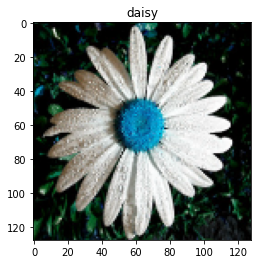

In [87]:
# Predicting and vizualizing the test image using pretrained Models
# VGG19

import matplotlib.pyplot as plt
%matplotlib inline

n = 10

plt.title(y_test[n])
plt.imshow(X_test[n])


print('-'*60)
print('VGG19')
y_pred_vgg19 = model_vgg19.predict(X_test[n].reshape(1, 128, 128, 3))
print("Softmax Outputs:", y_pred_vgg19)

# Convert the predicted probabilities to labels
for i in y_pred_vgg19:
    for j, k in enumerate(i):
        if k == y_pred_vgg19.max():
            print('Predicted_Label_vgg19:', labels[j])